<a href="https://colab.research.google.com/github/Yohanes213/Kaggle/blob/main/Big%20Data%20Derby%202022_Analyze%20horse%20racing%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving nyra_2019_complete.csv to nyra_2019_complete.csv


In [24]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [4]:
bdd = pd.read_csv('nyra_2019_complete.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
bdd.head()

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [8]:
bdd.isnull().sum()

AQU                        0
2019-01-01                 0
9                          0
6                          0
72                         0
40.6729017197787           0
-73.8276065972899          0
600                        0
D                          0
GD                         0
48                         0
CLM                        0
25000.00                   0
00420                      0
120                        0
Andre Shivnarine Worrie    0
2090                       0
8                          0
dtype: int64

In [9]:
bdd.columns

Index(['AQU', '2019-01-01', '9', '6  ', '72', '40.6729017197787',
       '-73.8276065972899', '600', 'D', 'GD ', '48', 'CLM', '25000.00',
       '00420', '120', 'Andre Shivnarine Worrie', '2090', '8'],
      dtype='object')

In [10]:
bdd = bdd.dropna()

In [12]:
bdd.columns

Index(['AQU', '2019-01-01', '9', '6  ', '72', '40.6729017197787',
       '-73.8276065972899', '600', 'D', 'GD ', '48', 'CLM', '25000.00',
       '00420', '120', 'Andre Shivnarine Worrie', '2090', '8'],
      dtype='object')

In [13]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228429 entries, 0 to 5228428
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   AQU                      object 
 1   2019-01-01               object 
 2   9                        int64  
 3   6                        object 
 4   72                       int64  
 5   40.6729017197787         float64
 6   -73.8276065972899        float64
 7   600                      int64  
 8   D                        object 
 9   GD                       object 
 10  48                       int64  
 11  CLM                      object 
 12  25000.00                 float64
 13  00420                    int64  
 14  120                      int64  
 15  Andre Shivnarine Worrie  object 
 16  2090                     int64  
 17  8                        int64  
dtypes: float64(3), int64(8), object(7)
memory usage: 757.9+ MB


In [18]:
del bdd['8']

In [21]:
bdd.columns

Index(['AQU', '2019-01-01', '9', '6  ', '72', '40.6729017197787',
       '-73.8276065972899', '600', 'D', 'GD ', '48', 'CLM', '25000.00',
       '00420', '120', 'Andre Shivnarine Worrie', '2090'],
      dtype='object')

In [22]:
bdd.columns = ['track_id', 
               'race_date',
               'race_number', 
               'program_number', 
               'trakus_index',
               'latitude', 
               'longtiude',
               'distance_id',
               'course_type',
               'track_condition',
               'run_up_distance',
               'race_type',
               'purse',
               'post_time',
               'weight_carried',
               'jockey',
               'odds']

In [23]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228429 entries, 0 to 5228428
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_date        object 
 2   race_number      int64  
 3   program_number   object 
 4   trakus_index     int64  
 5   latitude         float64
 6   longtiude        float64
 7   distance_id      int64  
 8   course_type      object 
 9   track_condition  object 
 10  run_up_distance  int64  
 11  race_type        object 
 12  purse            float64
 13  post_time        int64  
 14  weight_carried   int64  
 15  jockey           object 
 16  odds             int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 718.0+ MB


In [25]:
bdd.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longtiude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090


In [26]:
# Encode ordinal columns ( categorical values with dtype-object)

le = LabelEncoder()
obj = bdd.select_dtypes(include="object").columns
for f in obj:
    bdd[f] = le.fit_transform(bdd[f].astype(str))

print(bdd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228429 entries, 0 to 5228428
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         int64  
 1   race_date        int64  
 2   race_number      int64  
 3   program_number   int64  
 4   trakus_index     int64  
 5   latitude         float64
 6   longtiude        float64
 7   distance_id      int64  
 8   course_type      int64  
 9   track_condition  int64  
 10  run_up_distance  int64  
 11  race_type        int64  
 12  purse            float64
 13  post_time        int64  
 14  weight_carried   int64  
 15  jockey           int64  
 16  odds             int64  
dtypes: float64(3), int64(14)
memory usage: 718.0 MB
None


In [28]:
conv_dict = {
    'purse' : int
}

In [29]:
bdd = bdd.astype(conv_dict)

In [31]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228429 entries, 0 to 5228428
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         int64  
 1   race_date        int64  
 2   race_number      int64  
 3   program_number   int64  
 4   trakus_index     int64  
 5   latitude         float64
 6   longtiude        float64
 7   distance_id      int64  
 8   course_type      int64  
 9   track_condition  int64  
 10  run_up_distance  int64  
 11  race_type        int64  
 12  purse            int64  
 13  post_time        int64  
 14  weight_carried   int64  
 15  jockey           int64  
 16  odds             int64  
dtypes: float64(2), int64(15)
memory usage: 718.0 MB


In [33]:
fdf = bdd.head(1000)
data = fdf.drop(['track_id','program_number','race_date','latitude','longtiude','distance_id'],axis=1)
target = fdf['odds']

In [36]:
data.columns

Index(['race_number', 'trakus_index', 'course_type', 'track_condition',
       'run_up_distance', 'race_type', 'purse', 'post_time', 'weight_carried',
       'jockey', 'odds'],
      dtype='object')

In [37]:
print(data.shape, target.shape)

(1000, 11) (1000,)


In [39]:
x_train , x_test , y_train , y_test = train_test_split(data , target , train_size = 0.8 ,test_size =0.2 , random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 11) (200, 11) (800,) (200,)


In [45]:
model = Sequential([
    Dense(12 , input_dim = 11 , activation  = 'relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
     Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [46]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['mean_squared_error'])

In [47]:
history = model.fit(x_train,y_train, 
          batch_size=500,verbose=1,
          epochs = 200, validation_data = (x_test,y_test))

Epoch 1/200
2/2 [==============================] - 1s 150ms/step - loss: 3277905.2500 - mean_squared_error: 3277905.2500 - val_loss: 3525714.5000 - val_mean_squared_error: 3525714.5000
Epoch 2/200
2/2 [==============================] - 0s 43ms/step - loss: 3277880.0000 - mean_squared_error: 3277880.0000 - val_loss: 3525714.5000 - val_mean_squared_error: 3525714.5000
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 3277833.5000 - mean_squared_error: 3277833.5000 - val_loss: 3525714.5000 - val_mean_squared_error: 3525714.5000
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 3277876.5000 - mean_squared_error: 3277876.5000 - val_loss: 3525714.5000 - val_mean_squared_error: 3525714.5000
Epoch 5/200
2/2 [==============================] - 0s 22ms/step - loss: 3277840.2500 - mean_squared_error: 3277840.2500 - val_loss: 3525714.5000 - val_mean_squared_error: 3525714.5000
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 3277877

In [48]:
pd.DataFrame(history.history).head()

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,3277905.25,3277905.25,3525714.5,3525714.5
1,3277880.00,3277880.00,3525714.5,3525714.5
2,3277833.50,3277833.50,3525714.5,3525714.5
3,3277876.50,3277876.50,3525714.5,3525714.5
4,3277840.25,3277840.25,3525714.5,3525714.5


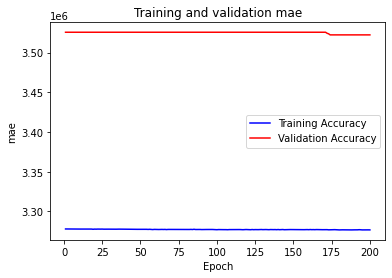

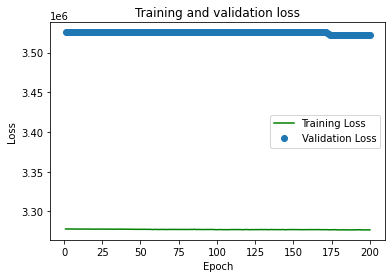

In [52]:
mae = history.history['mean_squared_error']
val_mae = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,mae,'b',label='Training Accuracy')
plt.plot(epochs,val_mae,'r',label='Validation Accuracy')
plt.title('Training and validation mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'g',label='Training Loss')
plt.plot(epochs,val_loss,'o',label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
pred_train = model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred_test = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test)))

25/25 [==============================] - 0s 2ms/step
1809.807539836764
7/7 [==============================] - 0s 2ms/step
1876.8026734315997
